In [201]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
seaborn.set()

df = pd.read_csv("unsupervised_benchmark.csv")
_max = df.groupby(["dataset","graph_type"]).agg("max").reset_index(level=0).reset_index(level=0)

<Figure size 1152x432 with 0 Axes>

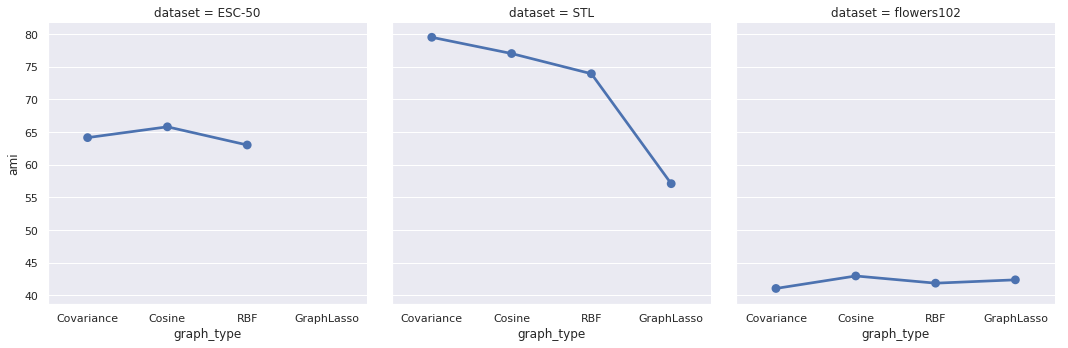

In [202]:
plt.figure(figsize=(16, 6))
ax1 = seaborn.catplot(data=_max,x="graph_type", y="ami", col="dataset",kind="point",order=["Covariance","Cosine","RBF","GraphLasso"])

<Figure size 1152x432 with 0 Axes>

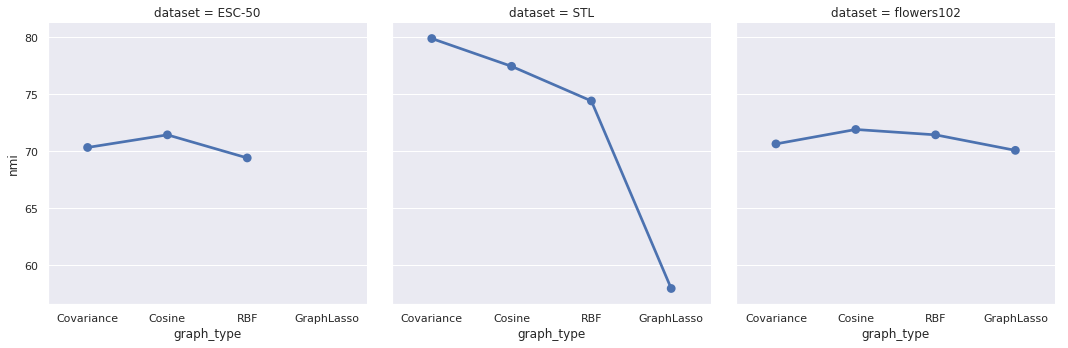

In [203]:
plt.figure(figsize=(16, 6))
ax1 = seaborn.catplot(data=_max,x="graph_type", y="nmi", col="dataset",kind="point",order=["Covariance","Cosine","RBF","GraphLasso"])

In [204]:
_max

,graph_type,dataset,minmaxscaler,nn,normalization,ami,nmi
0,Cosine,ESC-50,False,1000,None,65.809469,71.433868
1,Covariance,ESC-50,False,1000,None,64.156025,70.326170
2,RBF,ESC-50,False,1000,None,63.028471,69.408651
3,Cosine,STL,False,1000,None,77.021006,77.446254
4,Covariance,STL,False,1000,None,79.508474,79.883934
5,GraphLasso,STL,True,1000,None,57.109480,57.953281
6,RBF,STL,False,1000,None,73.931204,74.406932
7,Cosine,flowers102,False,1000,None,42.987211,71.904410
8,Covariance,flowers102,False,1000,None,41.077904,70.639028
9,GraphLasso,flowers102,True,1000,None,42.395719,70.072479
